In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

from plots import plot_features_scores
from transformers import SelectKBestTransformer, SelectFromModelTransformer
from paths import RAW_DIR

In [3]:
data = pd.read_csv(RAW_DIR / 'heart_disease.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [4]:
FEATURES = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']
TARGET = 'HeartDiseaseorAttack'

X = data[FEATURES]
y = data[TARGET]

### Univariate selection

In [15]:
selection_all = SelectKBestTransformer(mutual_info_classif, k=10)
selection_all.fit(X, y)
X_univariate = selection_all.transform(X)

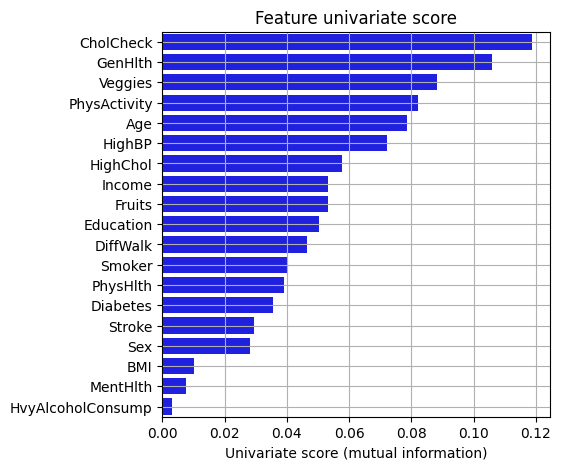

In [14]:
scores = selection_all.scores_
plot_features_scores(X, scores, metric_label='mutual information', figsize=(5, 5))

### Multivariate selection

In [24]:
lasso_selector = LogisticRegression(penalty='l1', solver='liblinear')
lasso_selector = SelectFromModelTransformer(
    lasso_selector, max_features=10).fit(X, y)
X_lasso = lasso_selector.transform(X)

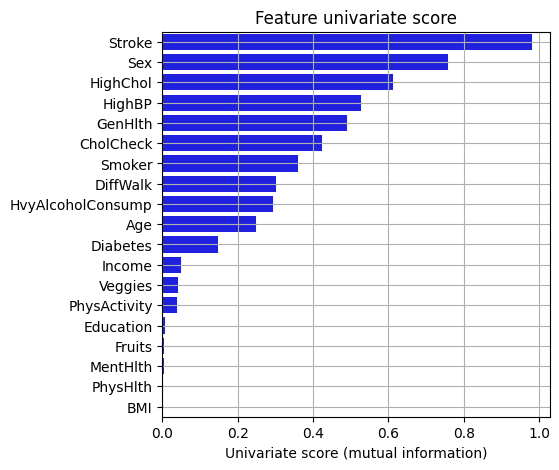

In [36]:
scores = np.abs(lasso_selector.estimator_.coef_.flatten())
plot_features_scores(X, scores, metric_label='mutual information', figsize=(5, 5))